In [47]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [48]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [49]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [96]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. Code from "https://www.codegrepper.com/code-examples/assembly/sqlalchemy+filter+by+date" 
june_averages = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) ==  "06").all()
    


In [97]:
#  3. Convert the June temperatures to a list.

june_results = list(np.ravel(june_averages))
june_results

['2010-06-01',
 '78.0',
 '2010-06-02',
 '76.0',
 '2010-06-03',
 '78.0',
 '2010-06-04',
 '76.0',
 '2010-06-05',
 '77.0',
 '2010-06-06',
 '78.0',
 '2010-06-07',
 '77.0',
 '2010-06-08',
 '78.0',
 '2010-06-09',
 '78.0',
 '2010-06-10',
 '79.0',
 '2010-06-11',
 '78.0',
 '2010-06-12',
 '78.0',
 '2010-06-13',
 '78.0',
 '2010-06-14',
 '77.0',
 '2010-06-15',
 '78.0',
 '2010-06-16',
 '78.0',
 '2010-06-17',
 '77.0',
 '2010-06-18',
 '77.0',
 '2010-06-19',
 '82.0',
 '2010-06-20',
 '78.0',
 '2010-06-21',
 '78.0',
 '2010-06-22',
 '78.0',
 '2010-06-23',
 '78.0',
 '2010-06-24',
 '78.0',
 '2010-06-25',
 '77.0',
 '2010-06-26',
 '76.0',
 '2010-06-27',
 '78.0',
 '2010-06-28',
 '78.0',
 '2010-06-29',
 '78.0',
 '2010-06-30',
 '78.0',
 '2011-06-01',
 '77.0',
 '2011-06-02',
 '78.0',
 '2011-06-03',
 '73.0',
 '2011-06-04',
 '70.0',
 '2011-06-05',
 '76.0',
 '2011-06-06',
 '77.0',
 '2011-06-07',
 '77.0',
 '2011-06-08',
 '77.0',
 '2011-06-09',
 '77.0',
 '2011-06-10',
 '78.0',
 '2011-06-11',
 '77.0',
 '2011-06-12',
 

In [98]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_averages, columns=['date','temperature'])
df.set_index(df['date'], inplace=True) 
print(df)
df = df.sort_index()
print(df.to_string(index=False))


                  date  temperature
date                               
2010-06-01  2010-06-01         78.0
2010-06-02  2010-06-02         76.0
2010-06-03  2010-06-03         78.0
2010-06-04  2010-06-04         76.0
2010-06-05  2010-06-05         77.0
...                ...          ...
2017-06-26  2017-06-26         79.0
2017-06-27  2017-06-27         74.0
2017-06-28  2017-06-28         74.0
2017-06-29  2017-06-29         76.0
2017-06-30  2017-06-30         75.0

[1700 rows x 2 columns]
      date  temperature
2010-06-01         78.0
2010-06-01         73.0
2010-06-01         77.0
2010-06-01         69.0
2010-06-01         76.0
2010-06-01         71.0
2010-06-01         74.0
2010-06-01         70.0
2010-06-01         74.0
2010-06-02         78.0
2010-06-02         70.0
2010-06-02         76.0
2010-06-02         76.0
2010-06-02         71.0
2010-06-02         76.0
2010-06-02         76.0
2010-06-02         72.0
2010-06-02         76.0
2010-06-03         74.0
2010-06-03         78.0
201

In [99]:
session.query(func.count(Station.station)).all()

[(9,)]

In [100]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [101]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [102]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_averages = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) ==  "12").all()

In [103]:
# 7. Convert the December temperatures to a list.

dec_results = list(np.ravel(june_averages))
dec_results

['2010-06-01',
 '78.0',
 '2010-06-02',
 '76.0',
 '2010-06-03',
 '78.0',
 '2010-06-04',
 '76.0',
 '2010-06-05',
 '77.0',
 '2010-06-06',
 '78.0',
 '2010-06-07',
 '77.0',
 '2010-06-08',
 '78.0',
 '2010-06-09',
 '78.0',
 '2010-06-10',
 '79.0',
 '2010-06-11',
 '78.0',
 '2010-06-12',
 '78.0',
 '2010-06-13',
 '78.0',
 '2010-06-14',
 '77.0',
 '2010-06-15',
 '78.0',
 '2010-06-16',
 '78.0',
 '2010-06-17',
 '77.0',
 '2010-06-18',
 '77.0',
 '2010-06-19',
 '82.0',
 '2010-06-20',
 '78.0',
 '2010-06-21',
 '78.0',
 '2010-06-22',
 '78.0',
 '2010-06-23',
 '78.0',
 '2010-06-24',
 '78.0',
 '2010-06-25',
 '77.0',
 '2010-06-26',
 '76.0',
 '2010-06-27',
 '78.0',
 '2010-06-28',
 '78.0',
 '2010-06-29',
 '78.0',
 '2010-06-30',
 '78.0',
 '2011-06-01',
 '77.0',
 '2011-06-02',
 '78.0',
 '2011-06-03',
 '73.0',
 '2011-06-04',
 '70.0',
 '2011-06-05',
 '76.0',
 '2011-06-06',
 '77.0',
 '2011-06-07',
 '77.0',
 '2011-06-08',
 '77.0',
 '2011-06-09',
 '77.0',
 '2011-06-10',
 '78.0',
 '2011-06-11',
 '77.0',
 '2011-06-12',
 

In [104]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(dec_averages, columns=['date','temperature'])
df.set_index(df['date'], inplace=True) 
print(df)
df = df.sort_index()
print(df.to_string(index=False))

                  date  temperature
date                               
2010-12-01  2010-12-01         76.0
2010-12-03  2010-12-03         74.0
2010-12-04  2010-12-04         74.0
2010-12-06  2010-12-06         64.0
2010-12-07  2010-12-07         64.0
...                ...          ...
2016-12-27  2016-12-27         71.0
2016-12-28  2016-12-28         71.0
2016-12-29  2016-12-29         69.0
2016-12-30  2016-12-30         65.0
2016-12-31  2016-12-31         65.0

[1517 rows x 2 columns]
      date  temperature
2010-12-01         76.0
2010-12-01         73.0
2010-12-01         72.0
2010-12-01         78.0
2010-12-01         72.0
2010-12-01         70.0
2010-12-01         71.0
2010-12-01         73.0
2010-12-02         71.0
2010-12-02         71.0
2010-12-02         73.0
2010-12-02         75.0
2010-12-02         74.0
2010-12-02         72.0
2010-12-02         74.0
2010-12-02         70.0
2010-12-03         67.0
2010-12-03         74.0
2010-12-03         70.0
2010-12-03         74.0
201

In [105]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:xlabel='date'>

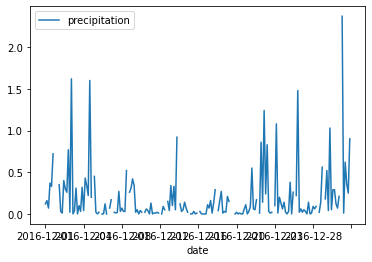

In [106]:
# Design a query to retrieve the 2 months of precipitation data and plot the results. 


# Perform a query to retrieve the data and precipitation scores
results = results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2016-12-31', Measurement.date >= '2016-12-01').all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)  

# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False)) # Do not show index
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

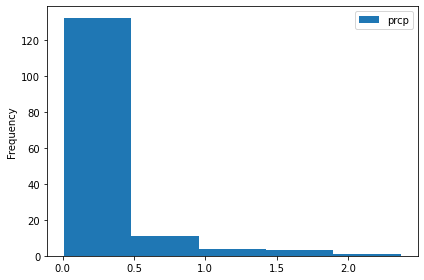

In [107]:
# Query the last 2 months of prcp observation data for this station and plot the results as a histogram
results = session.query(Measurement.prcp).\
filter(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2016-12-31', Measurement.date >= '2016-12-01').all()
#print(results)
df = pd.DataFrame(results, columns=['prcp'])
#print(df)
df.plot.hist(bins=5)
plt.tight_layout()

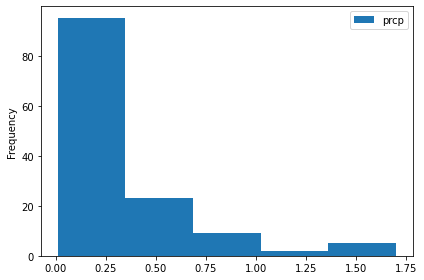

In [108]:
# Query the last 2 months of prcp observation data for this station and plot the results as a histogram
results = session.query(Measurement.prcp).\
filter(Measurement.date, Measurement.prcp).filter(Measurement.date <= '2016-06-30', Measurement.date >= '2016-06-01').all()
#print(results)
df = pd.DataFrame(results, columns=['prcp'])
#print(df)
df.plot.hist(bins=5)
plt.tight_layout()